<h3>
    Name: Babin Joshi <br/>
    Roll No: 19
</h3>    

<center>
    <h1>Topic Modeling</h1>
</center>

<h2>Latent Dirichlet Allocation</h2>

LDA and LDA—unfortunately, there are two methods in machine learning with
the initials LDA: latent Dirichlet allocation, which is a topic modeling method and
linear discriminant analysis, which is a classification method.
LDA and LDA—unfortunately, there are two methods in machine learning with
the initials LDA: latent Dirichlet allocation, which is a topic modeling method and
linear discriminant analysis, which is a classification method.

LDA belongs to a class of models that are called generative models as they have a
sort of fable, which explains how the data was generated. This generative story is
a simplification of reality, of course, to make machine learning easier. In the LDA
fable, we first create topics by assigning probability weights to words. Each topic
will assign different weights to different words. For example, a Python topic will
assign high probability to the word "variable" and a low probability to the word
"inebriated". When we wish to generate a new document, we first choose the topics it
will use and then mix words from these topics.

For example, let's say we have only three topics that books discuss:<br>
• Machine learning<br>
• Python<br>
• Baking<br>
For each topic, we have a list of words associated with it. This book will be a
mixture of the first two topics, perhaps 50 percent each. The mixture does not need
to be equal, it can also be a 70/30 split. When we are generating the actual text, we
generate word by word; first we decide which topic this word will come from. This is
a random decision based on the topic weights. Once a topic is chosen, we generate a
word from that topic's list of words. To be precise, we choose a word in English with
the probability given by the topic.
In this model, the order of words does not matter. This is a bag of words model as we
have already seen in the previous chapter. It is a crude simplification of language,
but it often works well enough, because just knowing which words were used in a
document and their frequencies are enough to make machine learning decisions.

<h2>Building a topic model</h2>

In [101]:
import matplotlib.pyplot as plt
from gensim import corpora, models

In [102]:
corpus = corpora.BleiCorpus('./data/ap/ap.dat','./data/ap/vocab.txt')

2021-04-10 16:52:35,333 : INFO : loading corpus from ./data/ap/ap.dat


In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
%matplotlib inline

The corpus variable holds all of the text documents and has loaded them in a
format that makes for easy processing. We can now build a topic model using
this object as input:

In [105]:
model = models.ldamodel.LdaModel(
            corpus,
            num_topics=100,
            id2word=corpus.id2word
)

2021-04-10 16:52:35,428 : INFO : using symmetric alpha at 0.01
2021-04-10 16:52:35,430 : INFO : using symmetric eta at 0.01
2021-04-10 16:52:35,435 : INFO : using serial LDA version on this node
2021-04-10 16:52:35,612 : INFO : caching corpus length
2021-04-10 16:52:35,951 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 2246 documents, updating model once every 2000 documents, evaluating perplexity every 2246 documents, iterating 50x with a convergence threshold of 0.001000
2021-04-10 16:52:35,953 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-04-10 16:52:36,376 : INFO : PROGRESS: pass 0, at document #2000/2246
2021-04-10 16:52:45,488 : INFO : merging changes from 2000 documents into a model of 2246 documents
2021-04-10 16:52:45,632 : INFO : topic #28 (0.010): 0.005*"i" + 0.004*"people" + 0.004*"last" + 0.004*"years" + 0.004*"new" + 0.004*"two"

This single constructor call will statistically infer which topics are present in the
corpus. <br>
We can see the list
of topics a document refers to using the model[doc] syntax

In [106]:
doc = corpus.docbyoffset(0)
print(len(doc))

186


In [107]:
topics = model[doc]
print(len(topics))

11


In [108]:
print(topics)

[(0, 0.018471913), (13, 0.066571906), (18, 0.05000919), (32, 0.038017444), (45, 0.2207377), (51, 0.109963626), (55, 0.012483726), (57, 0.20079543), (59, 0.19656171), (92, 0.014446603), (98, 0.040144995)]


The format of the result is a list of pairs: (topic_index, topic_weight). We can
see that only a few topics are used for each document (in the preceding example,
there is no weight for topics 0, 1, and 2; the weight for those topics is 0). The topic
model is a sparse model, as although there are many possible topics; for each
document, only a few of them are used. This is not strictly true as all the topics
have a nonzero probability in the LDA model, but some of them have such a small
probability that we can round it to zero as a good approximation.

We can explore this further by plotting a historgram of the number of topics that each document refers to:

In [109]:
num_topics_used = [len(model[doc])for doc in corpus]

In [110]:
len(num_topics_used)

2246

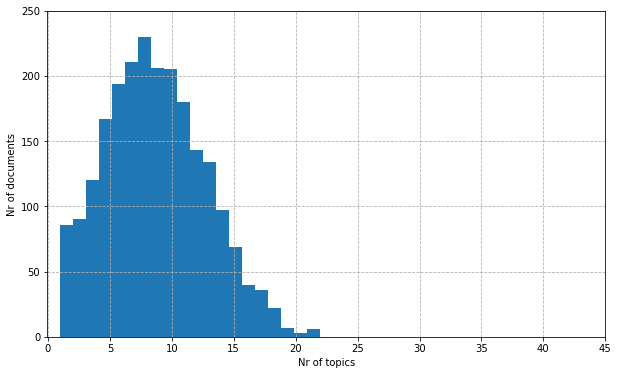

In [111]:
plt.figure(figsize=(10,6))
plt.hist(num_topics_used,bins=20)
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,300,50))
plt.grid(True,linestyle='--')
plt.show()

<b>Note:</b> Sparsity means that while you may have large matrices and vectors,
in principle, most of the values are zero (or so small that we can round
them to zero as a good approximation). Therefore, only a few things are
relevant at any given time.
Often problems that seem too big to solve are actually feasible because
the data is sparse. For example, even though any web page can link to
any other web page, the graph of links is actually very sparse as each
web page will link to a very tiny fraction of all other web pages

In the preceding graph, we can see that about 150 documents have 5 topics, while the
majority deals with around 10 to 12 of them. No document talks about more than 20
different topics.<br>
To a large extent, this is due to the value of the parameters that were used, namely,
the alpha parameter. The exact meaning of alpha is a bit abstract, but bigger values
for alpha will result in more topics per document.<br>
Alpha needs to be a value greater than zero, but is typically set to a lesser value,
usually, less than one. The smaller the value of alpha, the fewer topics each
document will be expected to discuss. By default, gensim will set alpha to 1/num_
topics, but you can set it explicitly by passing it as an argument in the LdaModel
constructor

In [112]:
model2 = models.ldamodel.LdaModel(corpus,
                                 num_topics=100,
                                 id2word=corpus.id2word,
                                 alpha=1
                                )

2021-04-10 16:52:54,692 : INFO : using symmetric eta at 0.01
2021-04-10 16:52:54,697 : INFO : using serial LDA version on this node
2021-04-10 16:52:54,808 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 2246 documents, updating model once every 2000 documents, evaluating perplexity every 2246 documents, iterating 50x with a convergence threshold of 0.001000
2021-04-10 16:52:54,809 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-04-10 16:52:55,020 : INFO : PROGRESS: pass 0, at document #2000/2246
2021-04-10 16:52:58,805 : INFO : merging changes from 2000 documents into a model of 2246 documents
2021-04-10 16:52:58,920 : INFO : topic #86 (1.000): 0.005*"new" + 0.004*"year" + 0.004*"president" + 0.004*"years" + 0.004*"last" + 0.004*"percent" + 0.003*"i" + 0.003*"two" + 0.003*"million" + 0.003*"government"
2021-04-10 16:52:58,922 : INFO : topic #95

In [113]:
num_topics_used2 = [len(model2[doc]) for doc in corpus]

In [114]:
num_topics_used2 = [len(model2[doc]) for doc in corpus]

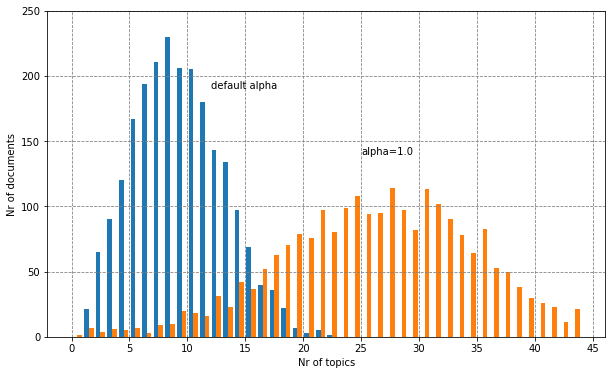

In [117]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist([num_topics_used, num_topics_used2], np.arange(45))
ax.text(12, 190, 'default alpha')
ax.text(25, 140, 'alpha=1.0')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(0,300,50))
plt.grid(True,linestyle='--',color='grey',)
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.show()

In [119]:
model2.show_topics()

[(58,
  '0.005*"percent" + 0.005*"i" + 0.005*"year" + 0.004*"people" + 0.004*"new" + 0.004*"years" + 0.004*"million" + 0.004*"state" + 0.004*"billion" + 0.004*"first"'),
 (84,
  '0.008*"percent" + 0.005*"new" + 0.005*"i" + 0.004*"two" + 0.004*"government" + 0.004*"people" + 0.004*"states" + 0.003*"year" + 0.003*"state" + 0.003*"last"'),
 (45,
  '0.007*"i" + 0.007*"percent" + 0.006*"year" + 0.004*"billion" + 0.004*"people" + 0.004*"two" + 0.004*"states" + 0.004*"new" + 0.004*"last" + 0.004*"president"'),
 (26,
  '0.007*"i" + 0.005*"percent" + 0.004*"last" + 0.004*"year" + 0.004*"million" + 0.004*"states" + 0.004*"two" + 0.004*"new" + 0.003*"people" + 0.003*"first"'),
 (39,
  '0.006*"percent" + 0.006*"new" + 0.005*"i" + 0.004*"billion" + 0.004*"two" + 0.004*"million" + 0.004*"united" + 0.004*"people" + 0.004*"year" + 0.003*"first"'),
 (65,
  '0.005*"i" + 0.005*"percent" + 0.004*"two" + 0.004*"government" + 0.004*"years" + 0.004*"people" + 0.004*"year" + 0.004*"last" + 0.004*"united" + 0.

In [121]:
for i in range(10):
    topics = []
    words = model.show_topic(i,10)
    for topic,_ in words:
        topics.append(topic)
    print(f"Topic - {i}: {', '.join(topics)}")

Topic - 0: trade, south, united, states, japan, north, agreement, japanese, government, talks
Topic - 1: publication, new, security, year, courting, applications, magazines, million, york, attack
Topic - 2: percent, poll, billion, bush, exports, handling, united, trade, rings, bushs
Topic - 3: shark, friday, videos, beach, fatalities, beaches, remarkably, impressive, californias, bubble
Topic - 4: taxes, i, electricity, new, percent, test, card, energy, people, soviet
Topic - 5: ruby, east, snake, german, maiziere, turnout, percent, government, experiments, years
Topic - 6: dedicated, biography, painter, army, asylum, deported, daniel, brutality, president, commodities
Topic - 7: footage, soldiers, raid, tape, castle, little, just, cox, i, swaziland
Topic - 8: vote, i, women, members, rights, burdick, womans, censorship, sponsoring, grant
Topic - 9: milan, wild, belgian, leader, i, two, last, air, new, military


<h2>Comparing documents by topics</h2>

In [122]:
from gensim import matutils

In [123]:
topics = matutils.corpus2dense(model[corpus],
                              num_terms=model.num_topics)

Now, topics is a matrix of topics. We can use the pdist function in SciPy to
compute all pairwise distances. That is, with a single function call, we compute
all the values of sum((topics[ti] – topics[tj])**2)

In [124]:
from scipy.spatial import distance

In [125]:
pairwise = distance.squareform(distance.pdist(topics))

In [126]:
largetst = pairwise.max()

Now, we will employ one last little trick; we will set the diagonal elements of the
distance matrix to a high value

In [127]:
for ti in range(len(topics)):
    pairwise[ti,ti] = largetst + 1

In [128]:
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [130]:
closest_to(1)

9

<h2>Modeling the whole of Wikipedia</h2>

In [133]:
!wget http://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2


"--2021-04-09 06:06:26--  http://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2  Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7 Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:80... connected. HTTP request sent, awaiting response... 301 Moved Permanently Location: https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 [following] --2021-04-09 06:06:27--  https://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2 Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected. HTTP request sent, awaiting response... 200 OK Length: 18416049294 (17G) [application/octet-stream] Saving to: `enwiki-latest-pages-articles.xml.bz2'\n  \n  enwiki-latest-pages 100%[===================>]  17.15G  4.75MB/s    in 64m 30s \n \n  2021-04-09 07:10:58 (4.54 MB/s) - `enwiki-latest-pages-articles.xml.bz2' saved [18416049294/18416049294] "


In [134]:
!python -m gensim.scripts.make_wiki enwiki-latest-pages-articles.xml.bz2 /content/wiki_en_output

In [135]:
import logging, gensim

In [136]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

In [138]:
id2word = gensim.corpora.Dictionary.load_from_text('wiki_en_output_wordids.txt')
mm = gensim.corpora.MmCorpus('wiki_en_output_tfidf.mm')

In [139]:
model = gensim.models.ldamodel.LdaModel(corpus=mm,
                                           id2word=id2word,
                                           num_topics=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=1)

In [140]:
model.save('wiki_lda.pkl')

2021-04-10 17:02:22,984 : INFO : saving LdaState object under wiki_lda.pkl.state, separately None
2021-04-10 17:02:23,032 : INFO : saved wiki_lda.pkl.state
2021-04-10 17:02:23,037 : INFO : saving LdaModel object under wiki_lda.pkl, separately ['expElogbeta', 'sstats']
2021-04-10 17:02:23,038 : INFO : storing np array 'expElogbeta' to wiki_lda.pkl.expElogbeta.npy
2021-04-10 17:02:23,043 : INFO : not storing attribute dispatcher
2021-04-10 17:02:23,044 : INFO : not storing attribute id2word
2021-04-10 17:02:23,045 : INFO : not storing attribute state
2021-04-10 17:02:23,047 : INFO : saved wiki_lda.pkl


In [141]:
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

2021-04-10 17:02:28,805 : INFO : loading LdaModel object from wiki_lda.pkl
2021-04-10 17:02:28,820 : INFO : loading expElogbeta from wiki_lda.pkl.expElogbeta.npy with mmap=None
2021-04-10 17:02:28,838 : INFO : setting ignored attribute dispatcher to None
2021-04-10 17:02:28,839 : INFO : setting ignored attribute id2word to None
2021-04-10 17:02:28,840 : INFO : setting ignored attribute state to None
2021-04-10 17:02:28,841 : INFO : loaded wiki_lda.pkl
2021-04-10 17:02:28,842 : INFO : loading LdaState object from wiki_lda.pkl.state
2021-04-10 17:02:28,876 : INFO : loaded wiki_lda.pkl.state


In [142]:
topics = model[doc]

In [143]:
topics = matutils.corpus2dense(model[corpus],
                               num_terms=model.num_topics)

In [144]:
lens = (topics > 0).sum(axis=0)
print(np.mean(lens))

8.864648263579697


In [145]:
print(np.mean(lens <= 10))

0.6718610863757791
